<a href="https://colab.research.google.com/github/christy726/Convolutional_Neural_Network/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.utils    import to_categorical
import numpy as np
from matplotlib import pyplot as plt

In [30]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtest = xtest.reshape (10000, 28, 28, 1)
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)

313/313 [==============================] - 2s 7ms/step - loss: 0.4355
0.4355160593986511
1/1 [==============================] - 0s 101ms/step
[7]


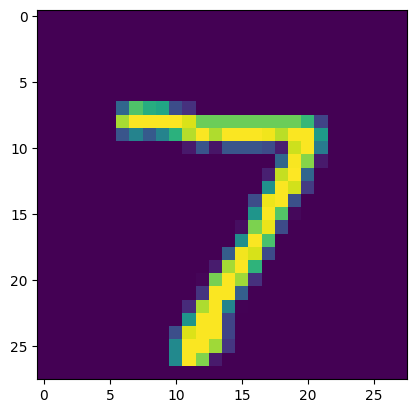

In [68]:
#1 INPUT-> CONV-> RELU-> FC
Samkhya = Sequential()
Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(Flatten())
Samkhya.add(Dense(10, activation='softmax'))

Samkhya.compile(loss='categorical_crossentropy')
Samkhya.fit(xtrain, ytrain, epochs=1, verbose=1)
print(Samkhya.evaluate(xtest, ytest, verbose=1))
#print(np.argmax(Samkhya.predict(xtest[0:1]), axis=1))
plt.imshow(xtest[0])
print(np.argmax(Samkhya.predict(xtest[0:1]),axis=1))

313/313 [==============================] - 2s 5ms/step - loss: 0.8241
0.8241119980812073
1/1 [==============================] - 0s 74ms/step
[7]


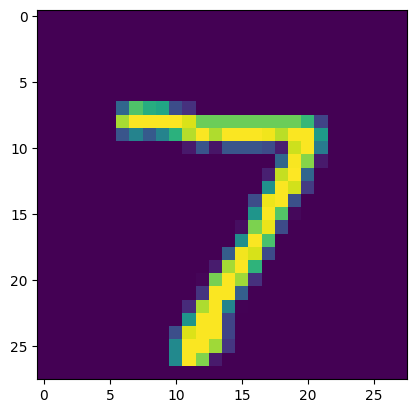

In [70]:
#2 INPUT-> [CONV-> RELU-> POOL]*2 -> FC-> RELU-> FC
Samkhya = Sequential()

Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(MaxPooling2D(pool_size=(2, 2)))

Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(MaxPooling2D(pool_size=(2, 2)))

Samkhya.add(Flatten())
Samkhya.add(Dense(10, activation='relu'))

Samkhya.add(Dense(10, activation='softmax'))


Samkhya.compile(loss='categorical_crossentropy')
Samkhya.fit(xtrain, ytrain, epochs=1, verbose=1)
print(Samkhya.evaluate(xtest, ytest, verbose=1))
plt.imshow(xtest[0])
print(np.argmax(Samkhya.predict(xtest[0:1]),axis=1))

313/313 [==============================] - 3s 8ms/step - loss: 1.2914
1.2914237976074219
1/1 [==============================] - 0s 121ms/step
[7]


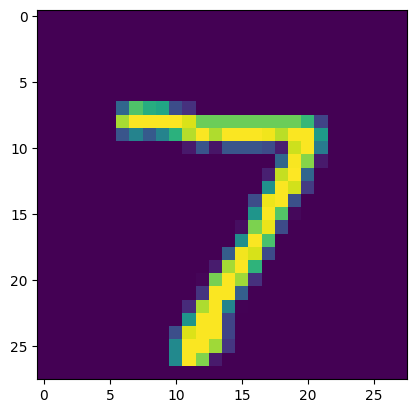

In [72]:
#3 INPUT-> [CONV-> RELU-> CONV-> RELU-> POOL]*3 -> [FC-> RELU]*2 ->FC
Samkhya = Sequential()

Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(Conv2D(1, (3, 3), padding="same", activation='relu'))
Samkhya.add(MaxPooling2D(pool_size=(2, 3)))

Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(Conv2D(1, (3, 3), padding="same", activation='relu'))
Samkhya.add(MaxPooling2D(pool_size=(2, 3)))

Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(Conv2D(1, (3, 3), padding="same", activation='relu'))
Samkhya.add(MaxPooling2D(pool_size=(2, 3)))


Samkhya.add(Flatten())
Samkhya.add(Dense(10, activation='relu'))
Samkhya.add(Dense(10, activation='relu'))

Samkhya.add(Dense(10, activation='softmax'))

Samkhya.compile(loss='categorical_crossentropy')
Samkhya.fit(xtrain, ytrain, epochs=1, verbose=1)
print(Samkhya.evaluate(xtest, ytest, verbose=1))
plt.imshow(xtest[0])
print(np.argmax(Samkhya.predict(xtest[0:1]),axis=1))

313/313 [==============================] - 2s 7ms/step - loss: 0.6614
0.6613627672195435
1/1 [==============================] - 0s 87ms/step
[7]


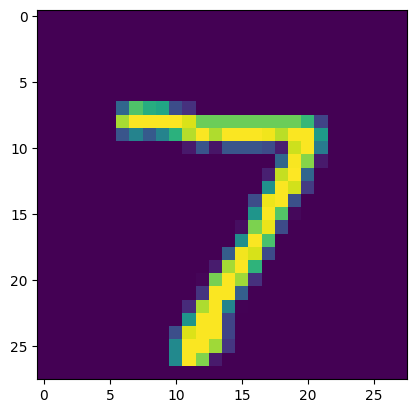

In [73]:
#4 INPUT-> CONV-> RELU-> BN-> CONV-> RELU-> FC-> DROPOUT-> FC-> SOFTMAX
Samkhya = Sequential()

Samkhya.add(Conv2D(1, (3,3), padding="same", input_shape=xtrain.shape[1:], activation='relu'))
Samkhya.add(BatchNormalization())
Samkhya.add(Conv2D(1, (3, 3), padding="same", activation='relu'))

Samkhya.add(Flatten())
Samkhya.add(Dense(10, activation='relu'))
Samkhya.add(Dropout(0.5))

Samkhya.add(Dense(10, activation='softmax'))


Samkhya.compile(loss='categorical_crossentropy')
Samkhya.fit(xtrain, ytrain, epochs=1, verbose=1)
print(Samkhya.evaluate(xtest, ytest, verbose=1))
plt.imshow(xtest[0])
print(np.argmax(Samkhya.predict(xtest[0:1]),axis=1))
